In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r'C:\Users\Imad\Desktop\New folder\census.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.columns = data.columns.str.strip()

In [6]:
data=data.dropna()

In [7]:
data = data.replace('?',np.nan)

In [8]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 10

Text(0.5, 1.0, 'Number of Male and Female')

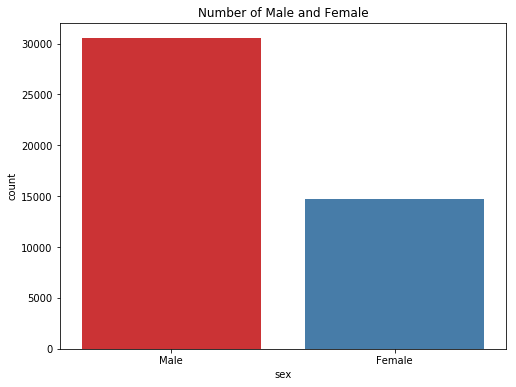

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'sex', data=data, palette = 'Set1').set_title("Number of Male and Female")


Text(0.5, 1.0, 'Income Level Count')

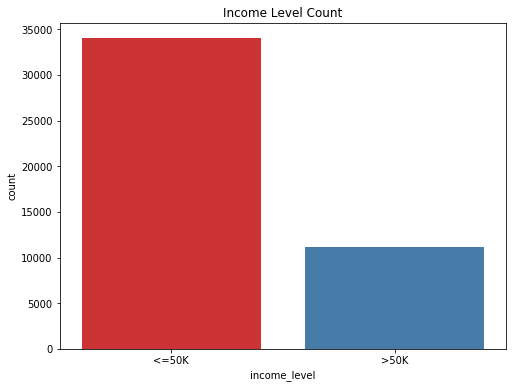

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'income_level', data=data, palette = 'Set1').set_title("Income Level Count")


Text(0.5, 1.0, 'Gender vs Income Level')

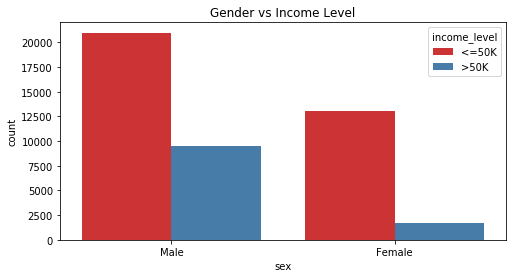

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'sex', hue='income_level', data=data, palette = 'Set1').set_title("Gender vs Income Level")


Text(0.5, 1.0, 'Relationship vs Income Level')

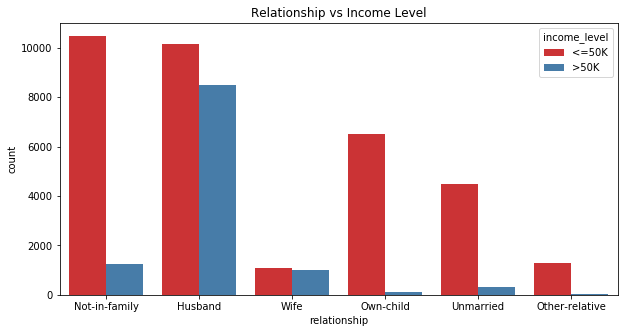

In [12]:
sns.countplot(x = 'relationship', hue='income_level', data=data, palette = 'Set1').set_title("Relationship vs Income Level")

Text(0.5, 1.0, 'Race vs Income Level')

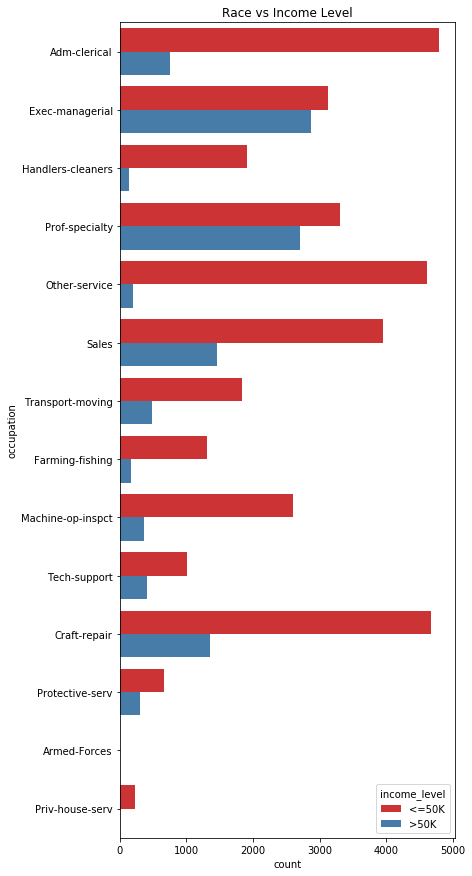

In [13]:
plt.figure(figsize=(6,15))
sns.countplot(y = 'occupation', hue='income_level', data=data, palette="Set1").set_title("Race vs Income Level")

Text(0.5, 1.0, 'Race vs Income Level')

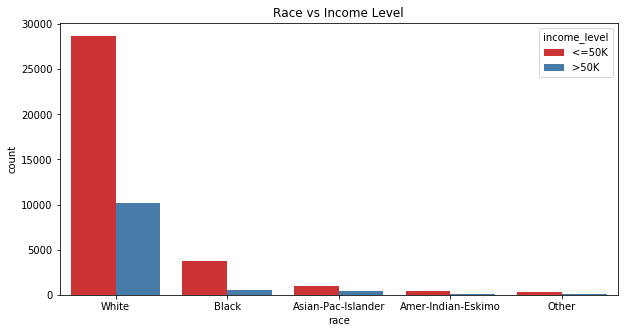

In [14]:
sns.countplot(x = 'race', hue='income_level', data=data, palette = 'Set1').set_title("Race vs Income Level")

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_level'], dtype='object')

In [17]:
workclass_1= LabelEncoder()
education_1= LabelEncoder()
marital_status_1= LabelEncoder()
occupation_1= LabelEncoder()
relationship_1= LabelEncoder()
race_1= LabelEncoder()
sex_1= LabelEncoder()
native_country_1= LabelEncoder()
income_level_1= LabelEncoder()


In [18]:
data['workclass_n']=workclass_1.fit_transform(data['workclass'])
data['education_n']=education_1.fit_transform(data['education'])
data['marital_status_n']=marital_status_1.fit_transform(data['marital_status'])
data['occupation_n']=occupation_1.fit_transform(data['occupation'])
data['relationship_n']=relationship_1.fit_transform(data['relationship'])
data['race_n']=race_1.fit_transform(data['race'])
data['sex_n']=sex_1.fit_transform(data['sex'])
data['native_country_n']=native_country_1.fit_transform(data['native_country'])
data['income_level_n']=income_level_1.fit_transform(data['income_level'])

In [19]:
data['income_level_n'].value_counts()

0    34014
1    11208
Name: income_level_n, dtype: int64

In [20]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_level', 'workclass_n', 'education_n', 'marital_status_n', 'occupation_n', 'relationship_n', 'race_n', 'sex_n', 'native_country_n', 'income_level_n'], dtype='object')

In [21]:
data_obs = data.drop(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income_level'], axis = 'columns')

In [22]:
data_obs.columns

Index(['capital_gain', 'capital_loss', 'workclass_n', 'education_n', 'marital_status_n', 'occupation_n', 'relationship_n', 'race_n', 'sex_n', 'native_country_n', 'income_level_n'], dtype='object')

In [23]:
inputs = data_obs.drop(['income_level_n'], axis = 'columns')
target = data_obs.drop(['workclass_n', 'education_n', 'marital_status_n', 'occupation_n', 'relationship_n', 'race_n', 'sex_n', 'native_country_n','capital_gain','capital_loss'], axis ='columns')


In [24]:
X = np.asarray(inputs)
X[0:5]

array([[2.174e+03, 0.000e+00, 5.000e+00, 9.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 3.800e+01],
       [0.000e+00, 0.000e+00, 4.000e+00, 9.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 3.800e+01],
       [0.000e+00, 0.000e+00, 2.000e+00, 1.100e+01, 0.000e+00, 5.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 3.800e+01],
       [0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 3.800e+01],
       [0.000e+00, 0.000e+00, 2.000e+00, 9.000e+00, 2.000e+00, 9.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 4.000e+00]])

In [25]:
y = np.asarray(target)
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.14288836, -0.21878026,  2.9177173 , -0.34407409,  0.94293603,
        -1.48262433, -0.25838652,  0.38411021,  0.69381348,  0.26299899],
       [-0.1467332 , -0.21878026,  1.87399717, -0.34407409, -0.3900051 ,
        -0.7375336 , -0.88447855,  0.38411021,  0.69381348,  0.26299899],
       [-0.1467332 , -0.21878026, -0.2134431 ,  0.17990154, -1.72294622,
        -0.24080645, -0.25838652,  0.38411021,  0.69381348,  0.26299899],
       [-0.1467332 , -0.21878026, -0.2134431 , -2.43997662, -0.3900051 ,
        -0.24080645, -0.88447855, -2.01874383,  0.69381348,  0.26299899],
       [-0.1467332 , -0.21878026, -0.2134431 , -0.34407409, -0.3900051 ,
         0.75264785,  2.24598156, -2.01874383, -1.44130956, -5.32930041]])

# SUPPORT VECTOR MACHINE with Jaccard Index, F1 score and Confusion Matrix. SVM:Linear, SVM:Polynomial, SVM:rbf

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state = 40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (30298, 10) (30298, 1)
Test set: (14924, 10) (14924, 1)


In [29]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [32]:
from sklearn import svm
clf_poly = svm.SVC(kernel = 'poly')
clf_linear = svm.SVC(kernel = 'linear')
clf_rbf = svm.SVC(kernel = 'rbf')

clf_poly.fit(X_train, y_train)
clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)


C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [98]:
y_1 = clf_poly.predict(X_test)
y_1 [0:5]

array([0, 0, 0, 0, 0])

In [99]:
y_2 = clf_linear.predict(X_test)
y_2 [0:5]

array([1, 0, 0, 0, 0])

In [100]:
y_3 = clf_rbf.predict(X_test)
y_3 [0:5]

array([0, 0, 0, 0, 0])

In [101]:
#F1 Score with kernel Polynomial and default degree
from sklearn.metrics import f1_score
f1_score(y_test, y_1, average='weighted')

0.7618221361282368

In [102]:
#F1 Score with Kernel Linear
from sklearn.metrics import f1_score
f1_score(y_test, y_2, average='weighted')

0.757115889222805

In [103]:
#F1 Score with kernel RBF(Guassian)
from sklearn.metrics import f1_score
f1_score(y_test, y_3, average='weighted')

0.7723271084253385

In [104]:
#Jaccard Index Score with Kernal Polynomial
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_1)

0.8027338515143393

In [105]:
#Jaccard Index Score with Kernel Linear
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_2)

0.7895336370946127

In [106]:
#Jaccard Index Score with kernel RBF
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_3)

0.8078933261860091

In [107]:
#Confusion Matrix with kernel Polynomial
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_1)

Text(69.0, 0.5, 'Truth')

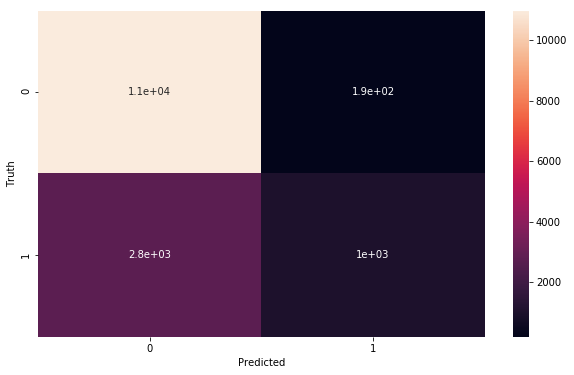

In [108]:
#Confusion Matrix and Classification Report for SVM with Polynomial Kernel
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
print (classification_report(y_test, y_1))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     11171
           1       0.84      0.27      0.40      3753

   micro avg       0.80      0.80      0.80     14924
   macro avg       0.82      0.62      0.64     14924
weighted avg       0.81      0.80      0.76     14924



In [110]:
#Confusion Matrix with kernel Linear
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(y_test, y_2)

Text(69.0, 0.5, 'Truth')

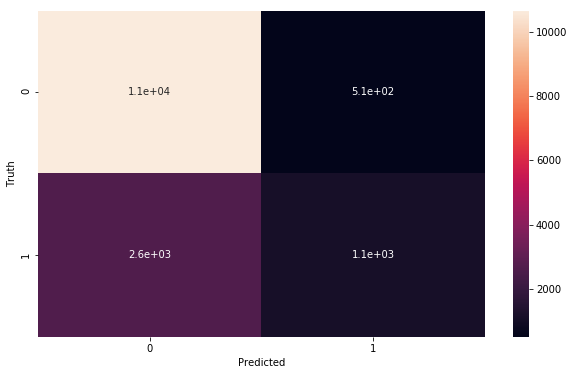

In [111]:
#Confusion Matrix and Classification Report for SVM with Polynomial Kernel
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm1,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
print (classification_report(y_test, y_2))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     11171
           1       0.69      0.30      0.42      3753

   micro avg       0.79      0.79      0.79     14924
   macro avg       0.74      0.63      0.64     14924
weighted avg       0.77      0.79      0.76     14924



In [113]:
#Confusion Matrix with kernel rbf

cm2 = confusion_matrix(y_test, y_3)

Text(69.0, 0.5, 'Truth')

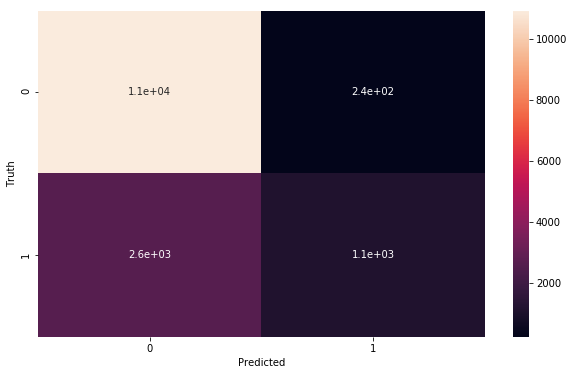

In [114]:
#Confusion Matrix and Classification Report for SVM with rbf Kernel
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm3,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
print (classification_report(y_test, y_3))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88     11171
           1       0.82      0.30      0.44      3753

   micro avg       0.81      0.81      0.81     14924
   macro avg       0.82      0.64      0.66     14924
weighted avg       0.81      0.81      0.77     14924



# Random Forest Classification with Jaccard Index , F1 score and Confusion Matrix 

In [116]:
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf=train_test_split(X,y, test_size = 0.2, random_state=8)

In [119]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=500)
model.fit(X_train_rf,y_train_rf)

C:\Users\Imad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
model.score(X_test_rf,y_test_rf)

0.8541735765616363

In [122]:
y_1_rf = model.predict(X_test_rf)
y_1_rf [0:5]

array([0, 0, 1, 0, 0])

In [123]:
f1_score(y_test_rf, y_1_rf, average='weighted') #Random Forest F1 Score

0.8487027503576603

In [124]:
jaccard_similarity_score(y_test_rf,y_1_rf)

0.8541735765616363

In [125]:
cm_rf = confusion_matrix(y_test_rf, y_1_rf)

Text(69.0, 0.5, 'Truth')

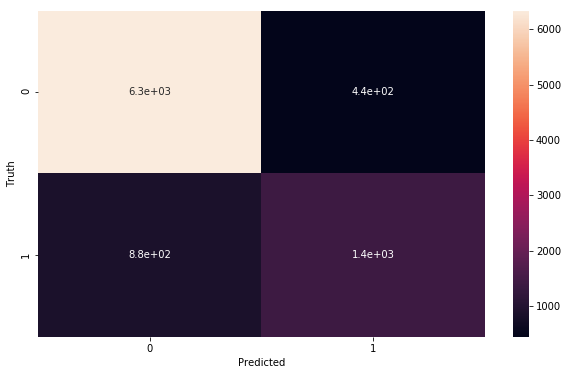

In [126]:
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm_rf,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [127]:
print (classification_report(y_test_rf, y_1_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6778
           1       0.76      0.61      0.68      2267

   micro avg       0.85      0.85      0.85      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



# Logistic Regression with Jaccard Index, F1 score and Confusion Matrix

In [129]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, y, test_size=0.2, random_state=100)
print ('Train set:', X_train_LR.shape,  y_train_LR.shape)
print ('Test set:', X_test_LR.shape,  y_test_LR.shape)

Train set: (36177, 10) (36177, 1)
Test set: (9045, 10) (9045, 1)


In [154]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_LR,y_train_LR)
LR

C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
y_LR = LR.predict(X_test_LR)
y_LR[0:5]

array([0, 1, 0, 0, 0])

In [158]:
LR.score(X_test_LR, y_test_LR)

0.7990049751243781

In [159]:
f1_score(y_test_rf, y_LR, average='weighted')

0.6508659015327952

In [156]:
jaccard_similarity_score(y_test_rf,y_LR)

0.7076838032061913

In [160]:
cm_LR = confusion_matrix(y_test_LR, y_LR)

Text(69.0, 0.5, 'Truth')

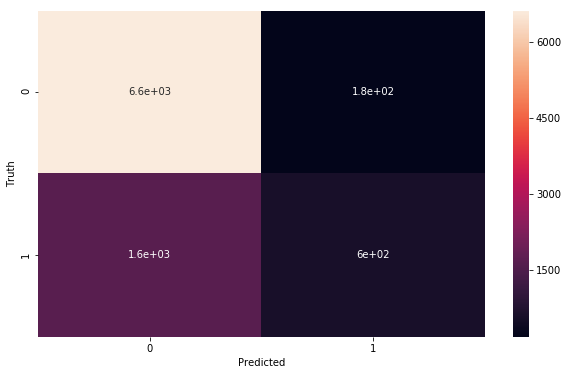

In [161]:
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm_LR,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [163]:
print(classification_report(y_test_LR,y_LR))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6800
           1       0.77      0.27      0.40      2245

   micro avg       0.80      0.80      0.80      9045
   macro avg       0.79      0.62      0.64      9045
weighted avg       0.79      0.80      0.76      9045



# K-NN classification with Jaccard Index, F1 score and Confusion Matrix

In [165]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train_KNN.shape,  y_train_KNN.shape)
print ('Test set:', X_test_KNN.shape,  y_test_KNN.shape)

Train set: (30298, 10) (30298, 1)
Test set: (14924, 10) (14924, 1)


In [167]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
model_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train_KNN,y_train_KNN)
model_KNN

C:\Users\Imad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [169]:
y_KNN = model_KNN.predict(X_test_KNN)
y_KNN[0:5]

array([0, 0, 0, 1, 0])

In [172]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train_KNN, model_KNN.predict(X_train_KNN)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_KNN, y_KNN))

Train set Accuracy:  0.8497590600039606
Test set Accuracy:  0.8282632002144197


In [173]:
k = 6
model_KNN1 = KNeighborsClassifier(n_neighbors = k).fit(X_train_KNN,y_train_KNN)
y_KNN1 = model_KNN1.predict(X_test_KNN)
print("Train set Accuracy: ", metrics.accuracy_score(y_train_KNN, model_KNN1.predict(X_train_KNN)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_KNN, y_KNN))


C:\Users\Imad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train set Accuracy:  0.8502211367086936
Test set Accuracy:  0.8282632002144197


In [179]:
model_KNN.score(X_test_KNN,y_test_KNN)

0.8318145269364782

In [183]:
jaccard_similarity_score(y_test_KNN, y_KNN)

0.6532430983650496

In [188]:
f1_score(y_test_KNN,y_KNN,average='weighted')

0.6387999459215031

In [189]:
cm_KNN = confusion_matrix(y_test_KNN, y_KNN)

Text(69.0, 0.5, 'Truth')

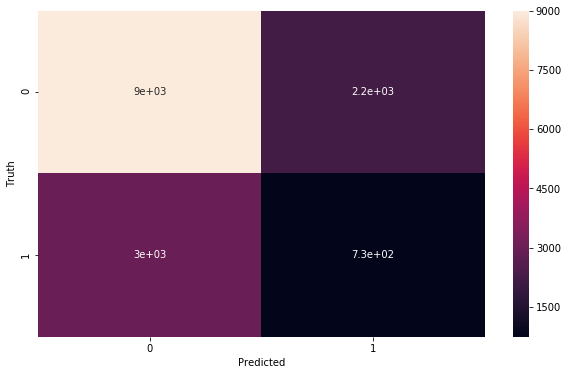

In [190]:
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm_KNN,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [191]:
print(classification_report(y_test_KNN, y_KNN))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78     11216
           1       0.25      0.20      0.22      3708

   micro avg       0.65      0.65      0.65     14924
   macro avg       0.50      0.50      0.50     14924
weighted avg       0.63      0.65      0.64     14924



# Naive Bayes Guassian with Jaccard Index, F1 score and Confusion Matrix

In [193]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train_NB.shape,  y_train_NB.shape)
print ('Test set:', X_test_NB.shape,  y_test_NB.shape)

Train set: (30298, 10) (30298, 1)
Test set: (14924, 10) (14924, 1)


In [195]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB(priors=None, var_smoothing=1e-09)
model_NB.fit(X_train_NB, y_train_NB)
model_NB

C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [199]:
y_NB=model_NB.predict(X_test_NB)

In [197]:
model_NB.score(X_test_NB,y_test_NB)

0.78725542749933

In [200]:
jaccard_similarity_score(y_test_NB, y_NB)

0.78725542749933

In [204]:
f1_score(y_test_NB,y_NB, average = 'weighted')

0.7566135586247076

In [205]:
cm_NB= confusion_matrix(y_test_NB,y_NB)

Text(69.0, 0.5, 'Truth')

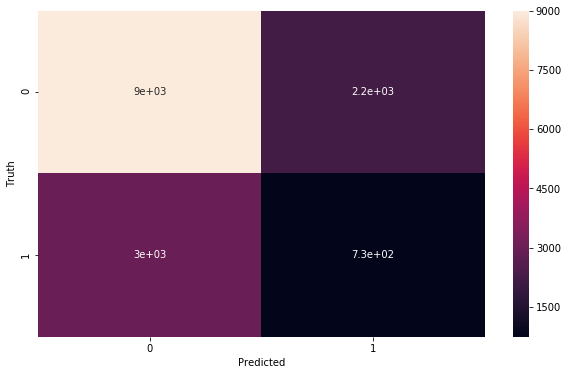

In [206]:
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm_KNN,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [208]:
print(classification_report(y_test_NB,y_NB))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     11216
           1       0.66      0.30      0.41      3708

   micro avg       0.79      0.79      0.79     14924
   macro avg       0.73      0.62      0.64     14924
weighted avg       0.77      0.79      0.76     14924



# Decision Tree Classification with Jaccard Index, F1 score and Confusion Matrix

In [209]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train_DT.shape,  y_train_DT.shape)
print ('Test set:', X_test_DT.shape,  y_test_DT.shape)

Train set: (30298, 10) (30298, 1)
Test set: (14924, 10) (14924, 1)


In [210]:
from sklearn import tree 
model_DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_DT.fit(X_train_DT,y_train_DT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [215]:
y_DT=model_DT.predict(X_test_DT)

In [213]:
model_DT.score(X_test_DT,y_test_DT)

0.8116456714017689

In [216]:
jaccard_similarity_score(y_test_DT,y_DT)

0.8116456714017689

In [218]:
f1_score(y_test_DT,y_DT, average = 'weighted')

0.7689842182704479

In [219]:
cm_DT=confusion_matrix(y_test_DT,y_DT)

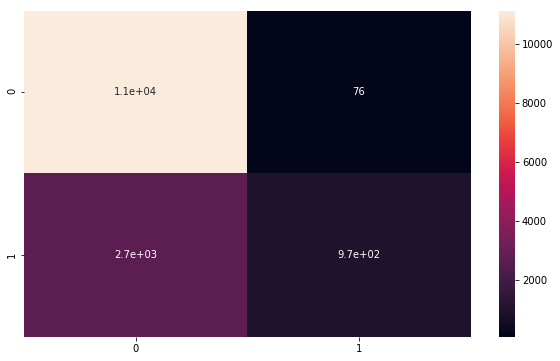

In [221]:
%matplotlib inline
plt.figure(figsize= (10,6))
sns.heatmap(cm_DT, annot = True)
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')
plt.show()

In [223]:
print(classification_report(y_test_DT,y_DT))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11216
           1       0.93      0.26      0.41      3708

   micro avg       0.81      0.81      0.81     14924
   macro avg       0.87      0.63      0.65     14924
weighted avg       0.83      0.81      0.77     14924

